# Zomato Data Analysis 

# In this project we will be addressing the following insights:-
1. What type of restaurants do the majority of customer order from?
2. How many votes has each type of restaurant received from customers?
3. What are the rating that the Average of restaurants have received?
4. Observation about Couples ordering most of the food online.What is their average spend on each order?
5. Which mode(online or offline) has received the maximum rating?
6. What is the average ticket size in both Online and Offline mode?
7. Which type of restaurant received more offline orders,so that Zomato can provide customers with some good offers?

- IMPORTING NECESSARY LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATA SET

In [11]:
data=pd.read_csv("F:/Download(F)/Zomato data .csv")
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# PERFORMING DATA CLEANING
- Removal of denominator (/5) from the rate column

In [13]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(handlerate)
data.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# DATA CLEANING 
- Fetching general information about data
-  Searching for null values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# 1. TYPES OF RESTAURANTS LISTED IN ZOMATO

In [16]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Resturant')

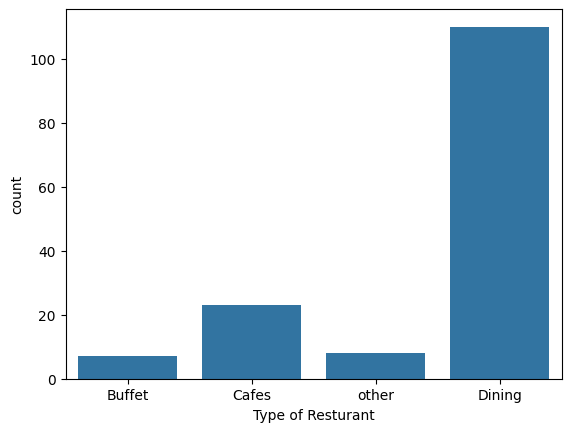

In [77]:
sns.countplot(x=data["listed_in(type)"])
plt.xlabel("Type of Resturant")

# Conclusion:
- Majority of Restuarant fall in Dining category 

# 2.  Votes given to different Resturants

In [28]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Total votes')

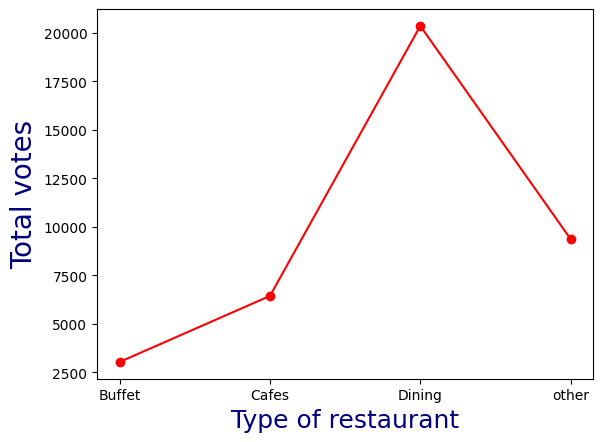

In [40]:
Votes_resturant=data.groupby("listed_in(type)")["votes"].sum()

plt.plot(Votes_resturant,c="red",marker='o')
plt.xlabel("Type of restaurant",size=18,color='navy')
plt.ylabel("Total votes",size=20,color='navy')

# Conclusion: 
- Dining resturant received the maximum votes while Buffet received the least.

# 3. Maximum rating and distribution

Text(0.5, 1.0, 'Ratings Distribution')

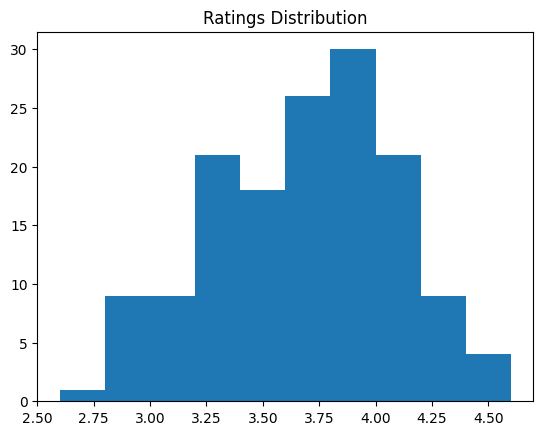

In [80]:
plt.hist(data["rate"])
plt.title("Ratings Distribution")

# Conclusion-
- Maximum ratings lie between 3.5 to 4

#  Average rating of different types of Resturants:
1. Buffet
2. Cafes
3. Dining
4. Others

Text(0, 0.5, 'Average Rating')

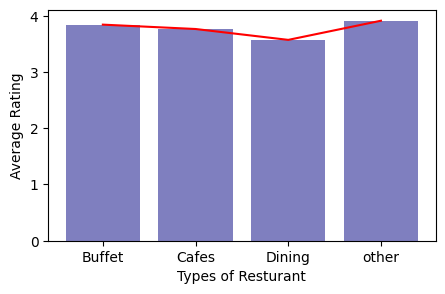

In [144]:
Average_rating=data.groupby("listed_in(type)")["rate"].mean() 
Average_rating
plt.figure(figsize=(5, 3))
plt.bar(Average_rating.index, Average_rating.values,alpha=0.5,color="navy")
plt.plot(Average_rating,color='red')
plt.xlabel("Types of Resturant")
plt.ylabel("Average Rating")




# Conclusion:
- Ranking according to average rating:-
1. Others
2. Buffet
3. Cafes
4. Dining

# 4. Average order spending by couples

In [84]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\HP\AppData\Local\Temp\ipykernel_20860\3700879744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Couple_data,palette='Set2')


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

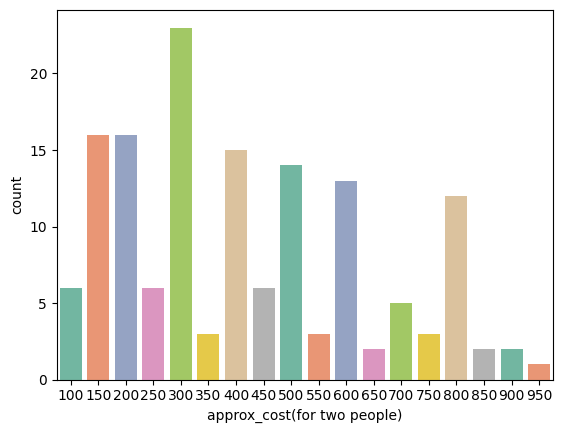

In [118]:
Couple_data=data["approx_cost(for two people)"]
sns.countplot(x=Couple_data,palette='Set2')

# Conslusion:
- The maximum couple("Cost of Two") prefer resturants with approximate cost of Rs 300

# 5. Rating Difference in Online and Offline Mode.

In [124]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

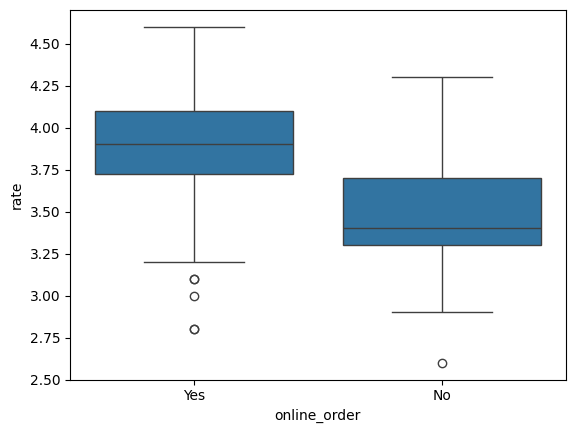

In [128]:
plt.figure(figure=(6,8))
sns.boxplot(x='online_order',y='rate',data=data)

# Conclusion:
- Offline order received lower rating in comparison to Online order.

# 6. Average Ticket Size in different modes of ordering
- Online
- Offline

In [134]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<BarContainer object of 2 artists>

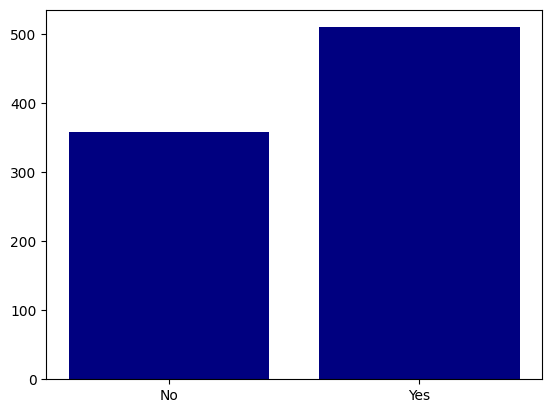

In [145]:
Average_Ticket=data.groupby("online_order")["approx_cost(for two people)"].mean()
plt.figure(figure=(2,3))
plt.bar(Average_Ticket.index,Average_Ticket.values,color='navy')



# Conclusion:
- Online mode of ordering offers better Ticket Size in comapison to Offline mode.

# 7. Type of restaurant received more offline orders

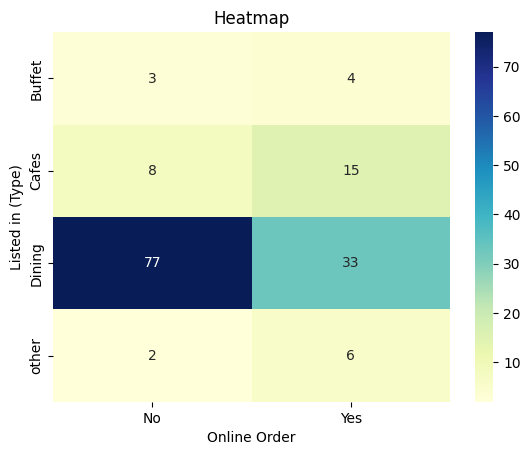

In [149]:
pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

# Consluion:
- Dining restaurants primarly accept offline orders,whereas cafes primarly receive online orders.
This suggests that clients prefer to order in person at restaurants ,but prefer online for ordering at cafes.